In [1]:
from rdkit import Chem
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, GridSearchCV, cross_val_score, cross_validate
import os
import glob
from scipy.stats import norm
import math
import random

In [2]:
#Read the data  读入撞击感度数值
T_0 = pd.read_excel('STy.xlsx')
T=np.array(T_0)
from sklearn import preprocessing  
#min_max_scaler = preprocessing.MinMaxScaler() 
#T=T_minMax = min_max_scaler.fit_transform(T)
#T=T.ravel()
print(T)  
print(len(T))


[[ 55.]
 [ 42.]
 [  9.]
 ...
 [137.]
 [116.]
 [129.]]
15987


In [3]:
#读入特征    1000种描述符数据 
X=pd.read_excel('STx.xlsx')
X=np.array(X)
from sklearn import preprocessing  
#min_max_scaler = preprocessing.MinMaxScaler() 
#X=X_minMax = min_max_scaler.fit_transform(X)
print(X)
print(len(X[0]))
print(len(X))

[[ 0  0  0 ...  0  0  9]
 [ 0  0  0 ...  0  0  9]
 [ 0  0  0 ...  0  0 26]
 ...
 [ 0  2  0 ...  0  0 29]
 [ 0  2  0 ...  0  0 24]
 [ 0  2  0 ...  0  0 30]]
3048
15987


In [4]:
from sklearn.model_selection import train_test_split
X_train,  X_test,  T_train,  T_test  =  train_test_split(X,T,test_size=0.10,random_state=34)

In [5]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
plt.style.use('ggplot')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

regressor = lgb.LGBMRegressor(n_estimators=2000)
regressor.fit(X_train,T_train)
lgb.LGBMRegressor(boosting_type='gbdt', class_weight=0.5, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.001, max_depth=4,
       min_child_samples=1, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=2000, n_jobs=-1, num_leaves=31,random_state=34, reg_alpha=0.01, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(class_weight=0.5, learning_rate=0.001, max_depth=4,
              min_child_samples=1, n_estimators=2000, random_state=34,
              reg_alpha=0.01)

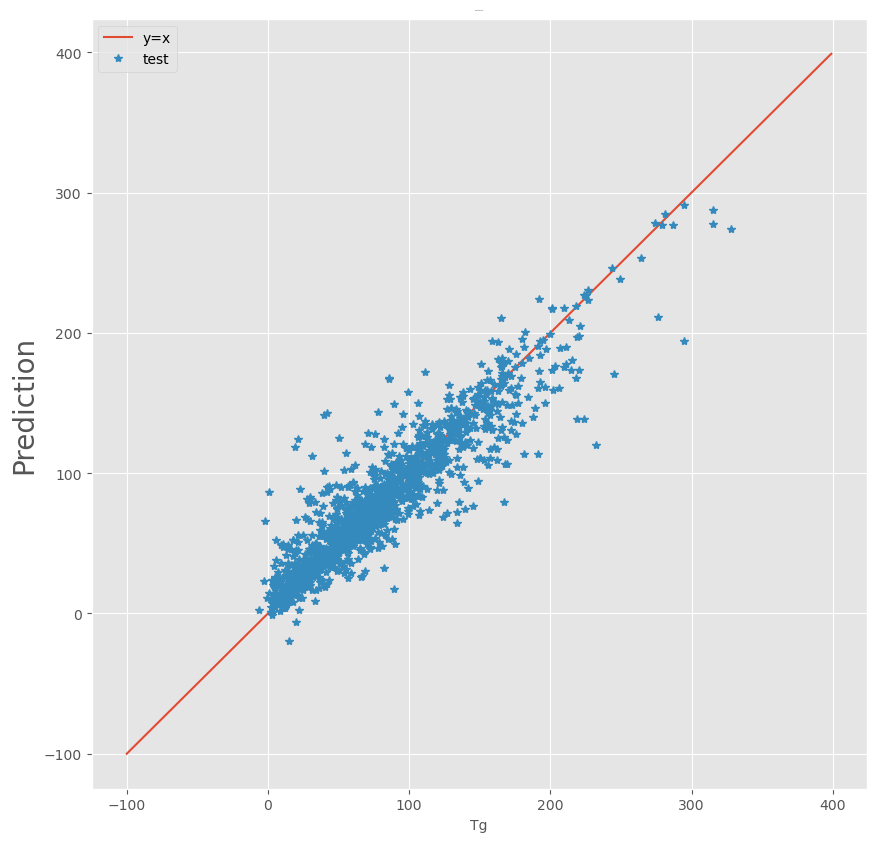

In [6]:
import matplotlib.pyplot as plt

y_true_test=T_test
y_pred_test=regressor.predict(X_test)
legend=["y=x","test"]
fig = plt.figure(figsize=(10,10))
plt.plot(range(-100,400), range(-100,400),"-")
plt.plot(y_true_test, y_pred_test,"*")
plt.xlabel("Tg", fontsize=10)
plt.ylabel('Prediction', fontsize=20)
plt.legend(legend,fontsize=10)
plt.title('Scatter Plot', fontsize=1)
plt.show()

In [7]:
from sklearn.metrics import r2_score
print ("测试集 r^2 score",r2_score(T_test,y_pred_test))

测试集 r^2 score 0.8630410706990568


In [8]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true=T_test
#y_pred=regressor.predict(X_test)
mean_absolute_error(y_true, y_pred_test)
#np.sqrt(mean_squared_error(y_true,y_pred))

12.272720484367811

In [9]:
np.sqrt(mean_squared_error(y_true,y_pred_test))

19.145940592065227

In [10]:
y_pred_test=regressor.predict(X_test)
df=pd.DataFrame(y_pred_test)
df.to_csv("./PLQY/resulttestEMPreLGB77E.csv",index=False,header=False)
y_true=T_test
df=pd.DataFrame(y_true)
df.to_csv("./PLQY/resulttestEMTrueLGB77E.csv",index=False,header=False)

<Figure size 1000x1000 with 0 Axes>

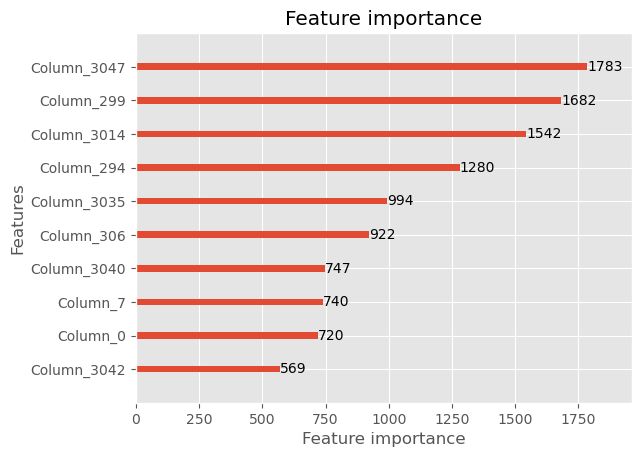

In [11]:
from lightgbm import plot_importance
# 显示重要特征
fig = plt.figure(figsize=(10,10))
plot_importance(regressor,max_num_features=10)
plt.show()

In [13]:
from sklearn.metrics import r2_score
y_true_train=T_train
y_pred_train=regressor.predict(X_train)
print ("训练集 r^2 score",r2_score(T_train,y_pred_train))

训练集 r^2 score 0.9843453720896643


In [14]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true=T_train
y_pred=regressor.predict(X_train)
mean_absolute_error(y_true, y_pred)
#np.sqrt(mean_squared_error(y_true,y_pred))

3.6508903814244675

In [15]:
np.sqrt(mean_squared_error(y_true,y_pred))

6.356103596122654

In [16]:
y_pred_train=regressor.predict(X_train)
df=pd.DataFrame(y_pred_train)
df.to_csv("./PLQY/resulttrainEMPreLGB77E.csv",index=False,header=False)
y_true=T_train
df=pd.DataFrame(y_true)
df.to_csv("./PLQY/resulttrainEMTrueLGB77E.csv",index=False,header=False)

In [17]:
test_y = T_test
test_x = X_test

In [18]:
cv_x = X_train
cv_y = T_train

In [19]:
from sklearn.metrics import r2_score
import lightgbm as lgb

cv_scores = []
test_scores = []
pred_valid = []
pred_test = []
MAE_scores = []
RMSE_scores = []

kf = KFold(n_splits=10, shuffle=True, random_state=725)
for train_ix, valid_ix in kf.split(cv_x):
    train_x = cv_x[train_ix]
    valid_x = cv_x[valid_ix]
    train_y = cv_y[train_ix]
    valid_y = cv_y[valid_ix]
    regressor = lgb.LGBMRegressor(n_estimators=2000)
    regressor.fit(train_x,train_y)
    lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                       importance_type='split', learning_rate=0.1, max_depth=-1,feature_fraction=0.6,bagging_fraction=0.6,
                       min_child_samples=10, min_child_weight=0.1, min_split_gain=0.0,
                       n_estimators=240, n_jobs=-1, objective='regression', num_leaves=30,
                       random_state=None, reg_alpha=0.6, reg_lambda=0.0, silent=True,
                       subsample=0.6, subsample_for_bin=200000, subsample_freq=0)
    val_results = regressor.predict(valid_x)
    pred_valid.append(val_results)
    valid_score = r2_score(valid_y,val_results)
    cv_scores.append(valid_score)
    
    test_results = regressor.predict(test_x)
    pred_test.append(test_results)
    test_score = r2_score(test_y,test_results)
    test_scores.append(test_score)
    y_true=test_y

    MAE_score = mean_absolute_error(test_y, test_results)
    MAE_scores.append(MAE_score)
    
    RMSE_score = np.sqrt(mean_squared_error(test_y, test_results))
    RMSE_scores.append(RMSE_score)

/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [20]:
print('test: {:.3f}+-{:.3f}'.format(np.array(test_scores).mean(), np.array(test_scores).std()))
print('test: {:.2f}+-{:.2f}'.format(np.array(MAE_scores).mean(), np.array(MAE_scores).std()))
print('test: {:.2f}+-{:.2f}'.format(np.array(RMSE_scores).mean(), np.array(RMSE_scores).std()))

test: 0.857+-0.004
test: 12.53+-0.14
test: 19.53+-0.27


In [21]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor (n_neighbors=3)
clf.fit (X_train,T_train)
train=clf.score(X_train,T_train)
test=clf.score(X_test, T_test)

In [22]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor (
bootstrap=True, criterion='mse', max_depth=None,
max_features='auto', max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
oob_score=False, random_state=None, verbose=0, warm_start=False)
clf.fit (X_train,T_train)
train=clf.score(X_train,T_train)
test=clf.score(X_test, T_test)

/tmp/ipykernel_75734/3954849391.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit (X_train,T_train)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [23]:
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn import linear_model
clf = KernelRidge(alpha=60.0, kernel='linear', gamma=None, degree=3, coef0=1, kernel_params=None)
clf.fit(X_train, T_train)  # 训练模型

KernelRidge(alpha=60.0)

In [24]:
from sklearn.cross_decomposition import PLSRegression
clf = PLSRegression(n_components=40)
clf.fit(X_train, T_train)  # 训练模型

PLSRegression(n_components=40)

In [25]:
from sklearn import linear_model
clf = linear_model.Lasso(max_iter=1000, random_state=0, alpha=0.01)  # 设置正则化强度
clf.fit(X_train, T_train)  # 参数拟合

/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.032e+06, tolerance: 3.713e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01, random_state=0)

In [26]:
from sklearn.svm import SVR
clf = SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.000001, gamma=1e-2,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
clf.fit(X_train,T_train)

/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100.0, epsilon=1e-06, gamma=0.01)